In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [4]:
# loading mobility data
data_subset = pd.read_csv(r'.\DataScienceData\mobility\12520739\unzipped\03_02\daily_ct2ct_03_02_0.csv')
data_subset.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
0,1001020100,1001020100,-86.490076,32.477185,-86.490076,32.477185,2020-03-02,176,1742.0
1,1001020100,1001020200,-86.490076,32.477185,-86.473375,32.474248,2020-03-02,11,108.0
2,1001020100,1001020300,-86.490076,32.477185,-86.460190,32.475428,2020-03-02,13,128.0
3,1001020100,1001020400,-86.490076,32.477185,-86.443624,32.472001,2020-03-02,19,188.0
4,1001020100,1001020500,-86.490076,32.477185,-86.422661,32.458833,2020-03-02,46,455.0


### This dataset contains mobility data of entire United States of America. Let's restrict ourself to Los Angeles to reduce problem size. 

In [5]:
# Downloading the census tract information of the Los Angeles
la = gpd.read_file(r'.\DataScienceData\mobility\geo boundry\los_angeles\Census_Tracts_2020.shp')
la.head()

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28494 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28101 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28735 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot:>

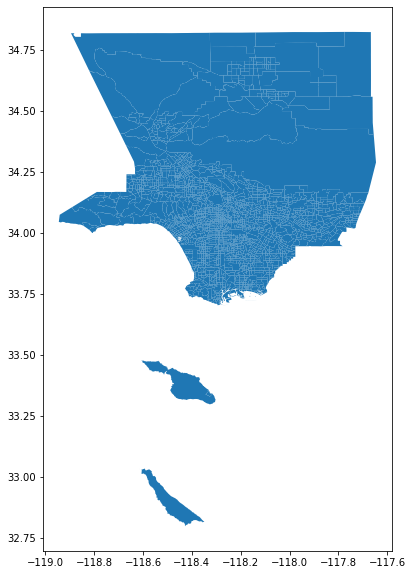

In [6]:
la.plot(figsize=(10, 10))

Perfect! So we have clear defined borders for the Los Angeles state. Also, we know that the StateFP for California is 06 and CountyFP for Los angeles is 037. So let's see the movement where Origin station was in Los angeles. 

In [7]:
LA_origin_data = data_subset[(data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 
LA_origin_data.shape

(1158, 9)

So we have 1158 different data rows where origin point was in LA. Let's how may have destination at LA.

In [8]:
LA_destination_data = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000)] 
LA_destination_data.shape

(2209, 9)

Now let's see how many just travelled locally. 

In [9]:
LA_local_movement = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000) & (data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 
LA_local_movement.shape

(865, 9)

This data doesn't seems to be enough. Let's loop through all the files. 

In [10]:
for i in range(1,20):
    x = pd.read_csv(r'.\DataScienceData\mobility\12520739\unzipped\03_02\daily_ct2ct_03_02_' + str(i) + '.csv')
    data_subset = pd.concat([data_subset, x], axis=0)
    print(data_subset.shape)

(963598, 9)
(1445397, 9)
(1927196, 9)
(2408995, 9)
(2890794, 9)
(3372593, 9)
(3854392, 9)
(4336191, 9)
(4817990, 9)
(5299789, 9)
(5781588, 9)
(6263387, 9)
(6745186, 9)
(7226985, 9)
(7708784, 9)
(8190583, 9)
(8672382, 9)
(9154181, 9)
(9635987, 9)


Now let's see the internal movement

In [11]:
LA_local_movement = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000) & (data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)]
LA_local_movement.shape

(280730, 9)

In [12]:
LA_local_movement.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
52914,6037430902,6037401304,-118.014528,34.134866,-117.812290,34.084984,2020-03-02,1,22.0
52917,6037430902,6037404401,-118.014528,34.134866,-117.916183,34.129228,2020-03-02,2,45.0
52918,6037430902,6037431001,-118.014528,34.134866,-118.005135,34.148412,2020-03-02,13,297.0
52919,6037430902,6037431100,-118.014528,34.134866,-117.997192,34.136076,2020-03-02,16,366.0
52921,6037430902,6037143700,-118.014528,34.134866,-118.356774,34.129185,2020-03-02,1,22.0


Now that is some decent amount of data. Let's plot first locations on interactive map to verify.

In [14]:
import folium
LA_map = folium.Map(location=[33.976848,-118.216677], zoom_start=10)
folium.Marker([34.134866, -118.014528], popup= 1).add_to(LA_map)
LA_map

Perfect! Now let's see which census tracts have most visitors.

In [17]:
visitor_by_cesus_tract = LA_local_movement.groupby(['geoid_d']).sum()['visitor_flows']
visitor_by_cesus_tract

geoid_d
6037101110    355
6037101122    216
6037101210    433
6037101220    214
6037101300    464
             ... 
6037980031    487
6037980033    469
6037990100      2
6037990200      3
6037990300      1
Name: visitor_flows, Length: 2346, dtype: int64

In [18]:
# census tract with most visitors
visitor_by_cesus_tract.idxmax()

6037980028

Plotting it on the graph using the lat long for the destination

In [19]:
LA_local_movement[LA_local_movement['geoid_d'] == 6037980028].iloc[0]

geoid_o          6037430400
geoid_d          6037980028
lng_o            -118.02587
lat_o             34.162516
lng_d           -118.413523
lat_d             33.939855
date             2020-03-02
visitor_flows             1
pop_flows              22.0
Name: 66424, dtype: object

In [20]:
folium.Marker([33.939855, -118.413523], popup= 6037980028).add_to(LA_map)
LA_map

We can see that the new marker is at Los Angeles internation airport. This makes sense as it could be the place where most trips end.

Census tracts are defined by population and doesn't have a fixed area. There are some census tracts that are massive in size and it may become hard to define where we can place charging station in them. 
Let's see how the map looks like when we remove largest 5% of the census tracts.

In [29]:
# We know that there are 2495 cesus tracts in Los Angeles, so 5% will be 125 
big_census_tracts = la.nlargest(125, 'ShapeSTAre')
big_census_tracts

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,geometry
2458,2459,930400,9304.00,1.608512e+10,945040.664102,"POLYGON ((-117.97230 34.43878, -117.97221 34.4..."
2425,2426,920102,9201.02,6.692471e+09,429191.043037,"POLYGON ((-118.76591 34.75362, -118.76576 34.7..."
2345,2346,901209,9012.09,6.428813e+09,568504.396588,"POLYGON ((-118.89265 34.81793, -118.89137 34.8..."
2397,2398,910815,9108.15,5.073502e+09,484681.336642,"POLYGON ((-118.06793 34.52817, -118.06528 34.5..."
2305,2306,900102,9001.02,4.743388e+09,321319.282729,"POLYGON ((-117.73551 34.82322, -117.73175 34.8..."
...,...,...,...,...,...,...
2479,2480,980021,9800.21,7.475771e+07,51403.146970,"POLYGON ((-118.36146 34.27318, -118.36152 34.2..."
1181,1182,400209,4002.09,7.388779e+07,40593.924234,"POLYGON ((-117.74167 34.14311, -117.74177 34.1..."
2236,2237,670702,6707.02,7.310262e+07,61559.676313,"POLYGON ((-118.31830 33.77491, -118.31832 33.7..."
2409,2410,920031,9200.31,7.277049e+07,51825.649307,"POLYGON ((-118.50084 34.41277, -118.50080 34.4..."


<AxesSubplot:>

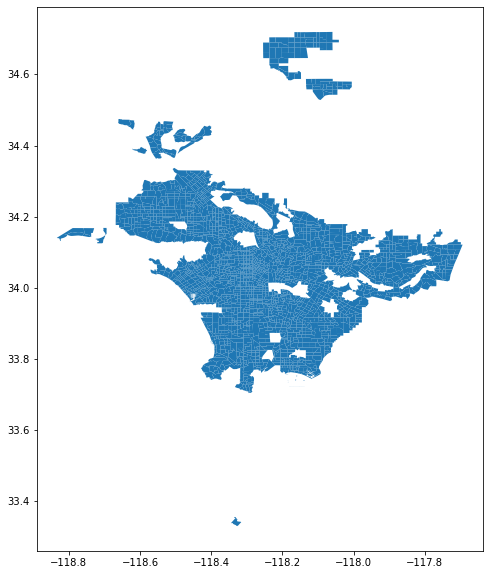

In [41]:
reduced_la = la.loc[~la['OBJECTID'].isin(big_census_tracts['OBJECTID'])]
reduced_la.plot(figsize=(10, 10))

The census tracts sizes look more homogenous now. Also, we know that the tract at the bottom of the map is on an island. So let's remove that as well. With a separate check we know that the id of this census tract is <b>599000</b>, let's remove it. 

<AxesSubplot:>

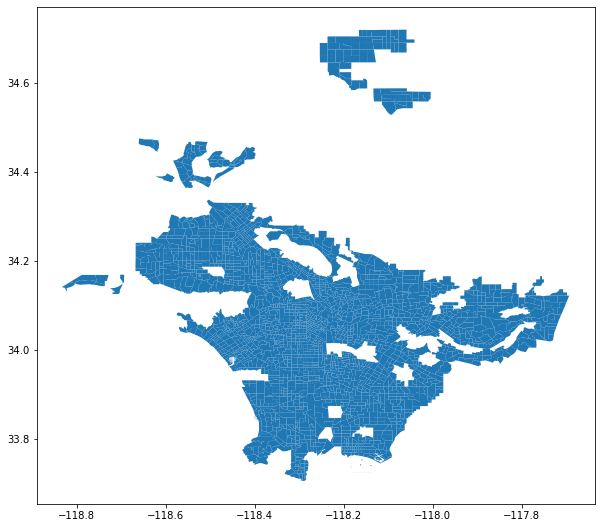

In [51]:
reduced_la = reduced_la.loc[reduced_la['CT20'] != '599000']
reduced_la.plot(figsize=(10, 10))

Now we can reduce the mobility data to only have these census tracts.

In [55]:
LA_local_movement.shape

(280730, 9)

In [56]:
LA_local_movement.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
52914,6037430902,6037401304,-118.014528,34.134866,-117.812290,34.084984,2020-03-02,1,22.0
52917,6037430902,6037404401,-118.014528,34.134866,-117.916183,34.129228,2020-03-02,2,45.0
52918,6037430902,6037431001,-118.014528,34.134866,-118.005135,34.148412,2020-03-02,13,297.0
52919,6037430902,6037431100,-118.014528,34.134866,-117.997192,34.136076,2020-03-02,16,366.0
52921,6037430902,6037143700,-118.014528,34.134866,-118.356774,34.129185,2020-03-02,1,22.0


In [58]:
LA_local_movement.loc[LA_local_movement['geoid_o'].isin('6037' + reduced_la['CT20'])]

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
52914,6037430902,6037401304,-118.014528,34.134866,-117.812290,34.084984,2020-03-02,1,22.0
52917,6037430902,6037404401,-118.014528,34.134866,-117.916183,34.129228,2020-03-02,2,45.0
52918,6037430902,6037431001,-118.014528,34.134866,-118.005135,34.148412,2020-03-02,13,297.0
52919,6037430902,6037431100,-118.014528,34.134866,-117.997192,34.136076,2020-03-02,16,366.0
52921,6037430902,6037143700,-118.014528,34.134866,-118.356774,34.129185,2020-03-02,1,22.0
...,...,...,...,...,...,...,...,...,...
480355,6037980019,6037262706,-118.548182,34.091300,-118.526454,34.036433,2020-03-02,1,17.0
480356,6037980019,6037262604,-118.548182,34.091300,-118.548412,34.051320,2020-03-02,2,35.0
480357,6037980019,6037137401,-118.548182,34.091300,-118.610839,34.159146,2020-03-02,1,17.0
480358,6037980019,6037262601,-118.548182,34.091300,-118.555790,34.073834,2020-03-02,1,17.0
